In [2]:
# читаем библиотеку
import pandas as pd

# читаем csv-файл
covid_data = pd.read_csv('data/covid_data.csv', sep=',')

# читаем csv-файл
vaccinations_data = pd.read_csv('data/country_vaccinations.csv', sep=',')
# оставляем необходимые признаки
vaccinations_data = vaccinations_data[['country','date', 'total_vaccinations',\
    'people_vaccinated','people_vaccinated_per_hundred', \
    'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred', \
    'daily_vaccinations', 'vaccines']]

# сгруппируем данные и просумирем некоторые признаки
covid_data = covid_data.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

# преобразуем признак date в формат datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

# создадим новый признак, количество больных на данный момент
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] -\
    covid_data['recovered']
    
# находим разницу двух последовательно идущих строк во всей таблице
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily confirmed'] = covid_data.groupby(by='country')['confirmed']\
    .diff()
covid_data['daily deaths'] = covid_data.groupby(by='country')['deaths']\
    .diff()
covid_data['daily recovered'] = covid_data.groupby(by='country')['recovered']\
    .diff()
    
# предобработаем таблицу vaccination_data
# изменим тип данных
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

# создадим сводную таблицу, которая сгрупированна по двум признакам
covid_df = covid_data.merge(
    vaccinations_data,
    how='left',
    on=['date', 'country']
)

# создаем признак показывающий общий процент смертей и выздоровлений 
# среди зафиксированных случаев
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recovered_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

In [13]:
display(covid_df.head(2))

,date,country,confirmed,deaths,recovered,active,daily confirmed,daily deaths,daily recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recovered_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


# Бибилиотека matplodlib

In [3]:
# импортирую библиоткеку и его модуль
import matplotlib.pyplot as plt
# отбражаем графики в ячейках Jupiter notebook
%matplotlib inline

.figure(figsize=()) & .add_axes([])

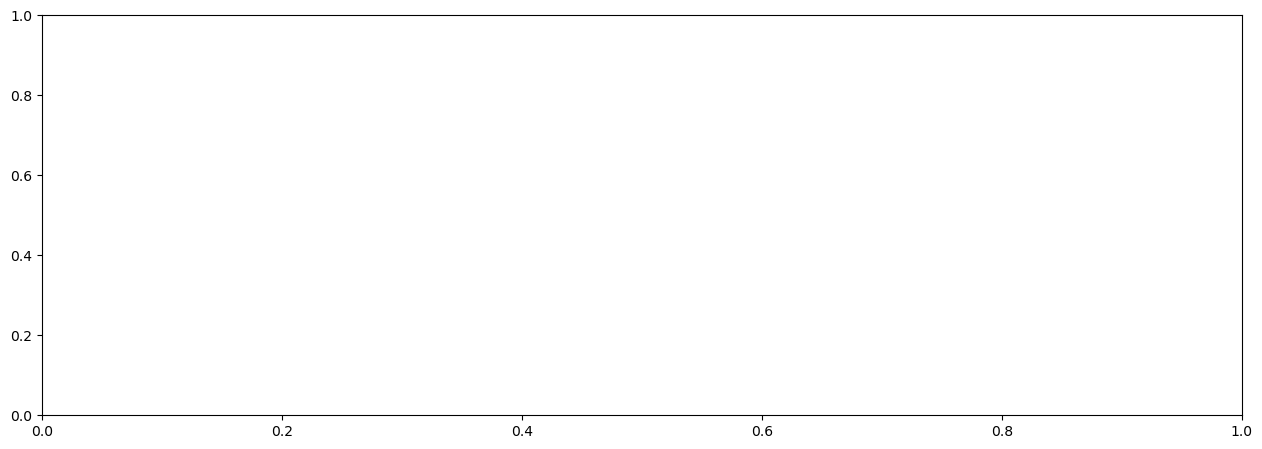

In [4]:
# создаю фигуру в которой будет располагаться координатная плоскость
fig = plt.figure(figsize=(12, 4))
# количество занимаемого места координатной плоскостью будет сто процентов
axes = fig.add_axes([0, 0, 1, 1])

## .scatter()



        x, y — последовательности, которые будут отложены по осям абсцисс и ординат;
        s — размер маркеров;
        marker — вид маркеров ('o' — точки, '^' — треугольники);
        c — цвет маркеров.



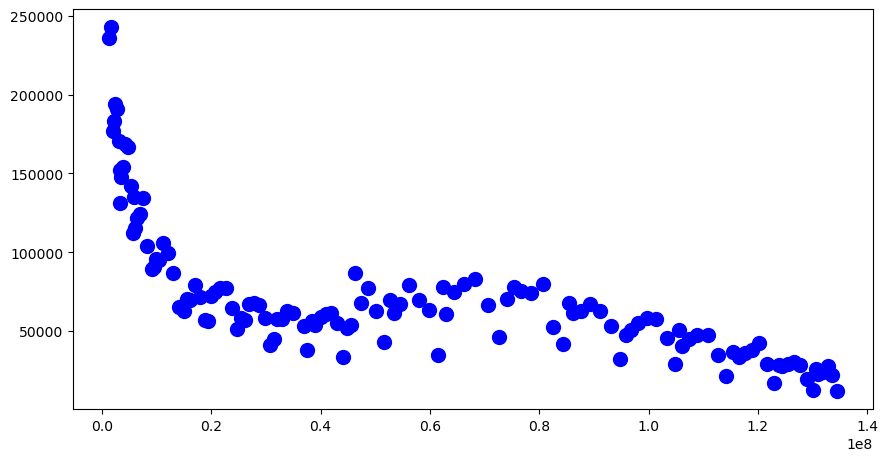

In [5]:
# осталвляем в таблице данные по США
us_data = covid_df[covid_df['country'] == 'United States']

# создаем фигуру
fig = plt.figure(figsize=(8, 4))
# создаю координатную плоскость в фигуре
axes = fig.add_axes([0, 0, 1, 1])

# создаю таблицу рассеяния
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily confirmed'],
    s=100,
    marker='o',
    c = 'blue'
);

## .pie()



        x — значения, по которым будет строиться круговая диаграмма;
        labels — метки, соответствующие значениям;
        autopct — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");
        explode — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x.



vaccines
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech        3059
Oxford/AstraZeneca                                                   1340
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         1293
Oxford/AstraZeneca, Sinopharm/Beijing                                1280
Oxford/AstraZeneca, Pfizer/BioNTech                                  1082
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V     830
Moderna, Pfizer/BioNTech                                              818
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing                440
Pfizer/BioNTech                                                       404
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V               401
Name: count, dtype: int64

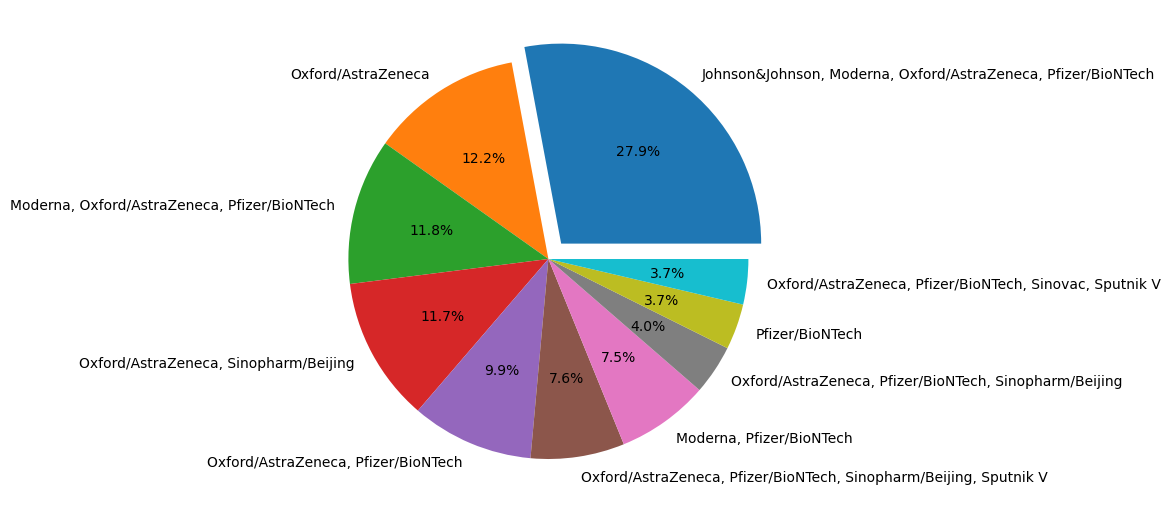

In [6]:
display(covid_df['vaccines'].value_counts()[:10])
# методом value_count и срезом берем значения для круговой диаграммы
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct= '%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

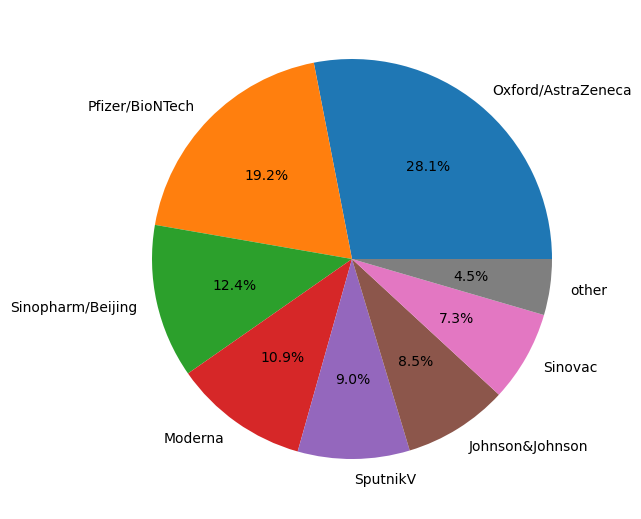

In [7]:
# избавляемся от пропускоа в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
# группируем по странам и находим последюю комбинацию вакцин в стране, 
# потому что признак является накопительным
combination_last = combination_not_nan.groupby('country')['vaccines'].last()
# заменяем пробелы и делим вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').\
    split(','))
# создаем пустой словарь ключами которого будут вакцины, 
# а знчениями количество стран
vaccines_dict = {}
# сохдаем цикл по элементам Series combination_last
for vaccines_list in combination_last:
    # создаем внутренний цикл по элементам списка вакцин
    for vaccine in vaccines_list:
        # проверяем условие, что текущей вакцины еще нет среди ключей словаря
        if vaccine not in vaccines_dict:
            # если условие выполняется, 
            # то заносим вакцину со значением 1 в словарь
            vaccines_dict[vaccine] = 1
        # в противном случе увеличеваем количество        
        else:
            vaccines_dict[vaccine] += 1
# преоразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
# выделяем топ-7 вакцин и добваляем категорию other
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
# строим круговую диаграмму
# строим фигуру
fig = plt.figure(figsize=(5, 5))
# описваю координатную плоскость
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%'
);

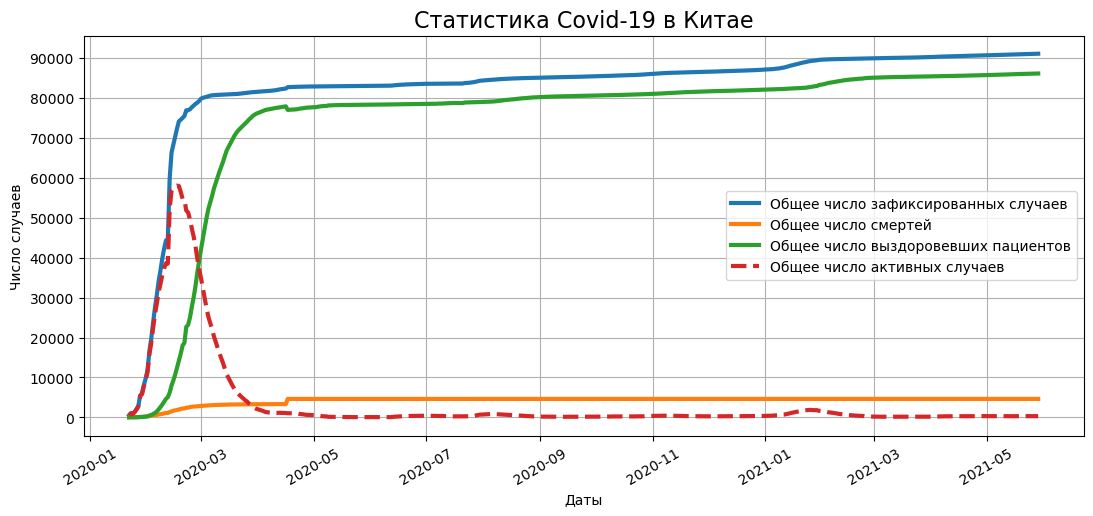

In [8]:
# фильтруем исходную таблицу covid_df по стране China
china_data = covid_df[covid_df['country'] == 'China']
# групируем по дате и агрегируем по нескольким признакам 
# для отображения их в линейной диаграмме
china_grouped = china_data.groupby(by='date')[['confirmed', 'active', \
    'deaths', 'recovered']].sum()

# созздаю фигруру
fig = plt.figure(figsize=(10, 4))
# выбираю обьем занимаемого пространства в процентах 
# для координатной плоскости внутри фигуры
axes = fig.add_axes([0, 0, 1, 1])

# отображаем диаграмму с нужными нам параметрами
axes.plot(china_grouped['confirmed'], \
    label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3),
axes.plot(china_grouped['recovered'], \
    label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', \
    lw=3, linestyle='dashed')

# Устанавливаем параметры отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();


## Использование нескольких систем коориднат

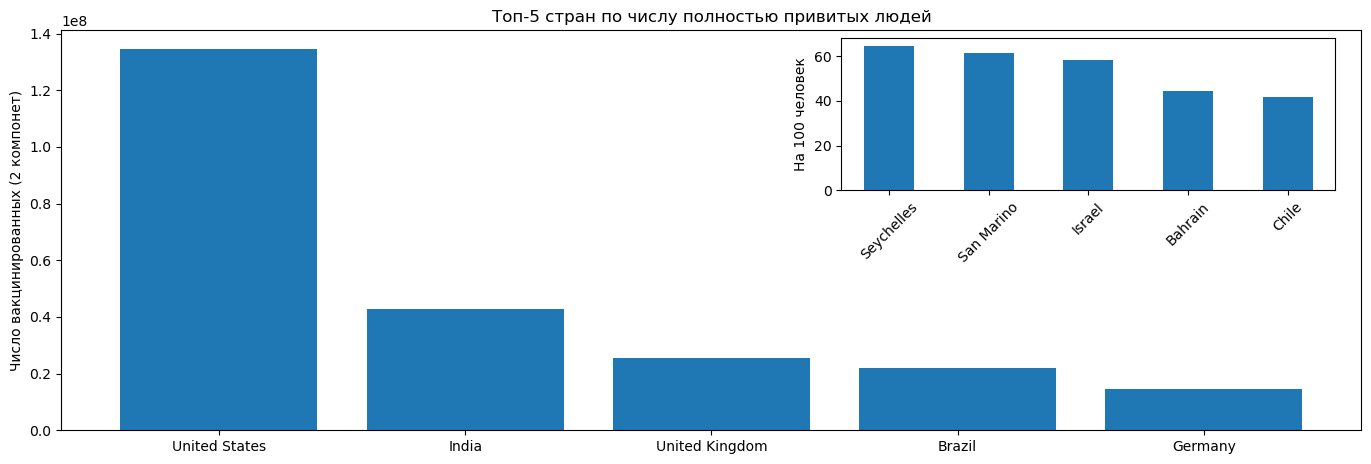

In [9]:
# пожготоваливаю Series для отображения столбчатой диаграммы, 
# главного графика
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].\
    last().nlargest(5)
# подготавливаю Series для вспомогательного грфика
vacc_country_per_hundred = covid_df.groupby('country')\
    ['people_fully_vaccinated_per_hundred'].last().nlargest(5)
    
# используем библиотеку matplotlib
fig = plt.figure(figsize=(13, 4))
# указываем размеры координатной плоскости
main_axes = fig.add_axes([0, 0, 1, 1])
# указываю какой тип визуализации и указываю данные, 
# которые должны быть отложены по оси абсцисс и ординат
main_axes.bar(x=vacc_country.index, height=vacc_country);
# указываем название оси ординат на графике
main_axes.set_ylabel('Число вакцинированных (2 компонет)')
# указываем название диаграммы
main_axes.set_title('Топ-5 стран по числу полностью привитых людей')

# создаем вспомогательный график
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
# указываем как и по каким данным должен быть отображен вспомогателный график
insert_axes.bar(x=vacc_country_per_hundred.index, \
    height=vacc_country_per_hundred, width=0.5);
# указываем название оси ординат
insert_axes.set_ylabel('На 100 человек')
# вращаем названия по кругу
insert_axes.xaxis.set_tick_params(rotation=45)
    

## .subplots()



        nrows — число строк;
        ncols — число столбцов;
        figsize — общий размер фигуры в дюймах (ширина и высота).



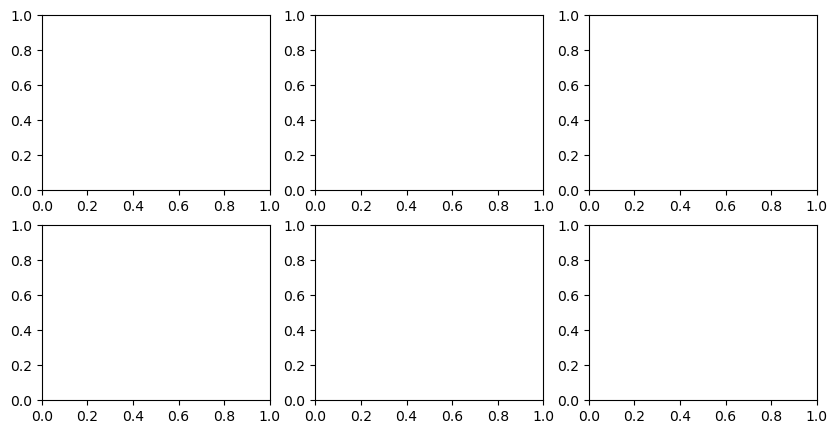

In [12]:
# создаем несколько координатных плоскостей в одной фигуре
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

## .hist()



        x — массив чисел, для которого строится гистограмма;
        bins — число столбцов (корзин);
        orientation — ориентация гистограммы (по умолчанию 'vertical');
        color — цвет.



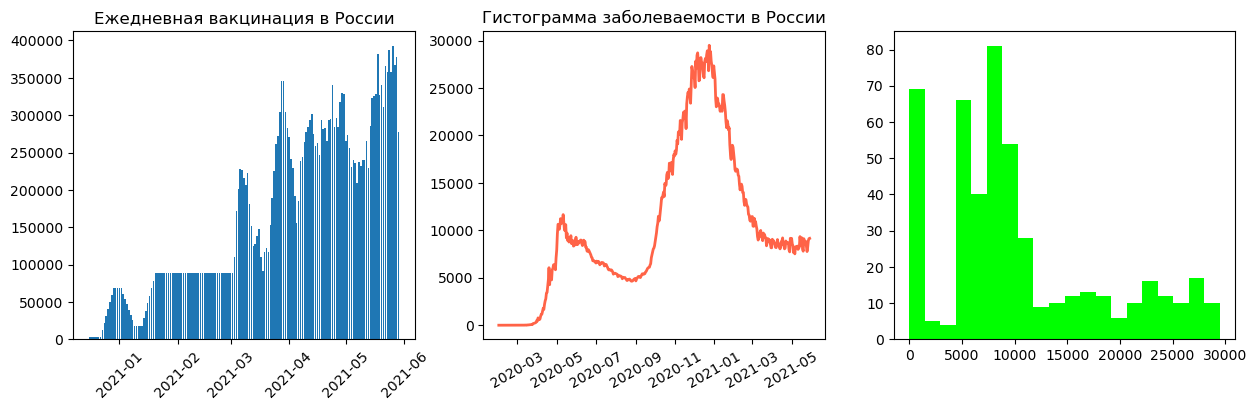

In [16]:
# фильтрую  исходную таблицу 
russian_data = covid_df[covid_df['country'] == 'Russia']
# строю три диаграммы в одной фигуре
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# получаю доступ через индексы к первой координатной плоскости 
axes[0].bar(
    x=russian_data['date'],
    height=russian_data['daily_vaccinations'],
    label='Число вакцинированных'
)
# добавляю инфориативность
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

# строю линейный график
axes[1].plot(
    russian_data['date'],
    russian_data['daily confirmed'],
    label='Число заболевших',
    color='tomato',
    lw=2
)
# называем грфик
axes[1].set_title('Ежедневная заболеваемость в России')
axes[1].xaxis.set_tick_params(rotation=45)

# строю гистограмму
axes[2].hist(
    x=russian_data['daily confirmed'], label='Число заболевших', \
    color='lime', bins=20
)
# добавляем описание гистограмме
axes[1].set_title('Гистограмма заболеваемости в России')
axes[1].xaxis.set_tick_params(rotation=30)

## Модульный подход

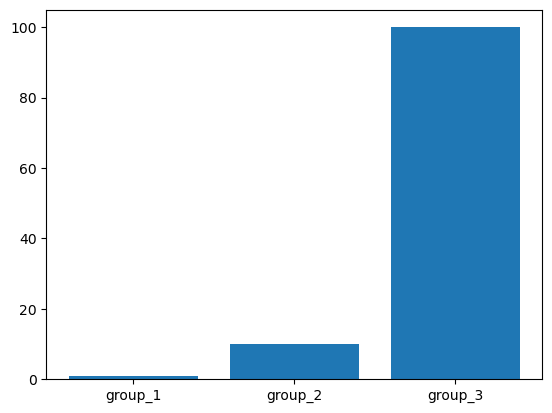

In [ ]:
# используем списки в качестве аргументов для метода
names = ['group_1', 'group_2', 'group_3']
values = [1, 10, 100]
# создаем столючатую диаграмму
plt.bar(names, values)
# изучаем столбчатую диаграмму
plt.show;